# 1. Análisis Exploratorio

In [2]:
# Importamos bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargamos datos y aseguramos que sean numéricos.
Zona_Comuna = pd.read_csv('/content/drive/MyDrive/Trabajo_final/Zona_Comuna.csv', delimiter=';')
Zona_Comuna['AREA'] = pd.to_numeric(Zona_Comuna['AREA'].str.replace(',', '.'), errors='coerce').abs()
Zona_Comuna['PERIMETER'] = pd.to_numeric(Zona_Comuna['PERIMETER'].str.replace(',', '.'), errors='coerce').abs()

In [4]:
# Cargamos datos y aseguramos que sean numéricos
Usos_Zona = pd.read_csv('/content/drive/MyDrive/Trabajo_final/Usos_Zona.csv', delimiter=';')
Usos_Zona.fillna(0, inplace=True)
Usos_Zona['Distancia al centro (Km)'] = pd.to_numeric(Usos_Zona['Distancia al centro (Km)'].str.replace(',', '.'), errors='coerce')
Usos_Zona['m2_Comercio'] = pd.to_numeric(Usos_Zona['m2_Comercio'].str.replace(',', '.'), errors='coerce')
Usos_Zona['m2_Industrial'] = pd.to_numeric(Usos_Zona['m2_Industrial'].str.replace(',', '.'), errors='coerce')
Usos_Zona['m2_Servicios'] = pd.to_numeric(Usos_Zona['m2_Servicios'].str.replace(',', '.'), errors='coerce')
Usos_Zona['m2_Otros'] = pd.to_numeric(Usos_Zona['m2_Otros'].str.replace(',', '.'), errors='coerce')
Usos_Zona['Valor de oferta de vivienda (uf/m2) '] = pd.to_numeric(Usos_Zona['Valor de oferta de vivienda (uf/m2) '].str.replace(',', '.'), errors='coerce')

In [5]:
# Unimos datasets
Usos_Final = pd.merge(Usos_Zona, Zona_Comuna, left_on='Zona_EOD', right_on='Zona', how='left')
Usos_Final

,id,Zona_EOD,LETRA,Distancia al centro (Km),m2_Comercio,m2_Educacion,m2_Residencial,m2_Industrial,m2_Servicios,m2_Otros,...,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2),ID,AREA,Zona,Com,Comuna,PERIMETER
0,1,1,0,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,...,483.0,1492.0,0.0,NaN,1,3.322938e+05,1,13101,Santiago,2387.304832
1,2,2,0,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,...,425.0,4316.0,3431.0,34.79,2,3.210641e+05,2,13101,Santiago,2269.318125
2,3,3,0,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,...,1452.0,1594.0,0.0,32.26,3,3.306885e+05,3,13101,Santiago,2301.318272
3,4,4,0,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,...,139.0,1520.0,0.0,37.92,4,3.174328e+05,4,13101,Santiago,2256.239626
4,5,5,0,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,...,15.0,0.0,0.0,NaN,5,3.101944e+05,5,13101,Santiago,2238.872264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,736,692,0,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,...,0.0,1705.0,0.0,NaN,692,3.258026e+05,692,13201,Puente Alto,2558.369697
736,737,693,0,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,...,0.0,1211.0,0.0,NaN,693,7.520971e+05,693,13201,Puente Alto,3695.621379
737,738,694,0,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,...,0.0,967.0,0.0,NaN,694,2.218971e+07,694,13201,Puente Alto,24603.534290
738,739,695,0,17.08,NaN,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,695,4.464453e+06,695,13201,Puente Alto,8415.330798


##  Identificamos posibles inconsistencias, datos faltantes, puntos atípicos u otros.

In [6]:
# Aquí revisaremos si existen Zonas_EOD con datos de m2 que hayan quedado sin comuna asignada.
# El resultado muestra un dataset vacio, por lo que podemos asumir que todas las zonas eod con datos de m2 construidos (740 zonas) tienen una comuna asignada.
comuna_nan = Usos_Final[Usos_Final['Comuna'].isna()]
comuna_nan

,id,Zona_EOD,LETRA,Distancia al centro (Km),m2_Comercio,m2_Educacion,m2_Residencial,m2_Industrial,m2_Servicios,m2_Otros,...,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2),ID,AREA,Zona,Com,Comuna,PERIMETER


In [7]:
# Corregimos el dataset, ya que en algunos casos tenemos Zona y Letra (ej: 114A y 114B) por lo cual agruparemos los datos en funcion del codigo de la zona.
# Para una correcta agregación los atributos m2 por usos se suman, al igual que GSE y matriculas. La informacion que se pego via merge se mantiene el primero (ya que se repite)
# Se aprovecha de eliminar campos 'id', 'LETRA', 'Distancia al centro', 'm2_Otros', y de la información que venia via el merge se eliminan 'ID', 'Zona', 'Com'

agregacion = {
    'id': 'first',
    'LETRA': 'first',
    'Distancia al centro (Km)': 'first',
    'm2_Comercio': 'sum',
    'm2_Educacion': 'sum',
    'm2_Residencial': 'sum',
    'm2_Industrial': 'sum',
    'm2_Servicios': 'sum',
    'm2_Otros': 'sum',
    'GSE Alto': 'sum',
    'GSE Medio Alto': 'sum',
    'GSE Medio': 'sum',
    'GSE Medio bajo': 'sum',
    'GSE Bajo': 'sum',
    'Ed. Básica y Media': 'sum',
    'Ed. Superior': 'sum',
    'Valor de oferta de vivienda (uf/m2) ': 'first',
    'ID': 'first',
    'AREA': 'first',
    'Zona': 'first',
    'Com': 'first',
    'Comuna': 'first',
    'PERIMETER': 'first'
}

Usos_Final_agrupado = Usos_Final.groupby('Zona_EOD').agg(agregacion).reset_index()
Usos_Final_agrupado = Usos_Final_agrupado.drop(['id', 'LETRA', 'Distancia al centro (Km)', 'ID', 'Zona', 'Com'], axis=1)
Usos_Final = Usos_Final_agrupado
Usos_Final

,Zona_EOD,m2_Comercio,m2_Educacion,m2_Residencial,m2_Industrial,m2_Servicios,m2_Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2),AREA,Comuna,PERIMETER
0,1,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN,3.322938e+05,Santiago,2387.304832
1,2,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.79,3.210641e+05,Santiago,2269.318125
2,3,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.26,3.306885e+05,Santiago,2301.318272
3,4,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.92,3.174328e+05,Santiago,2256.239626
4,5,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN,3.101944e+05,Santiago,2238.872264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,692,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN,3.258026e+05,Puente Alto,2558.369697
691,693,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN,7.520971e+05,Puente Alto,3695.621379
692,694,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN,2.218971e+07,Puente Alto,24603.534290
693,695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.464453e+06,Puente Alto,8415.330798


In [8]:
# Cambiamos el nombre de la columna 'Valor de oferta de vivienda (uf/m2) ', cuyo espacio genera errores, a uno más simple.
Usos_Final.rename(columns={'Valor de oferta de vivienda (uf/m2) ': 'UF/m2'}, inplace=True)

# Renombramos el dataframe para integrarlo en el trabjo grupal
df = Usos_Final

In [9]:
# revisamos nuevamente los datos
# Observamos que la columna UF/m2 posee sólo el 35% de los datos.
# Evaluamos eliminar, pero decidimos que por su importancia será mantenida y estudiada.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zona_EOD            695 non-null    int64  
 1   m2_Comercio         695 non-null    float64
 2   m2_Educacion        695 non-null    float64
 3   m2_Residencial      695 non-null    float64
 4   m2_Industrial       695 non-null    float64
 5   m2_Servicios        695 non-null    float64
 6   m2_Otros            695 non-null    float64
 7   GSE Alto            695 non-null    float64
 8   GSE Medio Alto      695 non-null    float64
 9   GSE Medio           695 non-null    float64
 10  GSE Medio bajo      695 non-null    float64
 11  GSE Bajo            695 non-null    float64
 12  Ed. Básica y Media  695 non-null    float64
 13  Ed. Superior        695 non-null    float64
 14  UF/m2               243 non-null    float64
 15  AREA                695 non-null    float64
 16  Comuna  

## Indicadores, tablas y gráficas apropiadas.

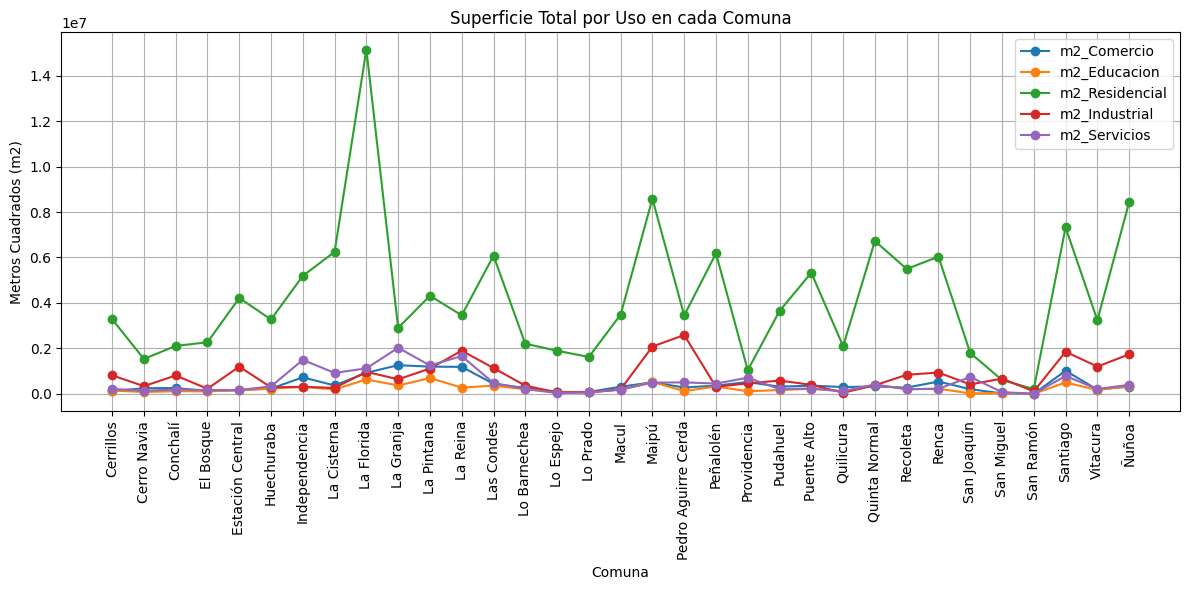

In [10]:
# Agrupar por 'Comuna' y sumar los valores de las columnas
df_grouped = df.groupby('Comuna')[['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios']].sum()

# Crear el gráfico
plt.figure(figsize=(12, 6))

for columna in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[columna], marker='o', label=columna)

# Añadir título y etiquetas
plt.title('Superficie Total por Uso en cada Comuna')
plt.xlabel('Comuna')
plt.ylabel('Metros Cuadrados (m2)')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Matriz de correlación
Resume los coeficientes de Pearson para cada par de variables en una matriz de correlación.
### Coeficiente de Pearson
Mide la fuerza de correlación entre dos variables numéricas

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

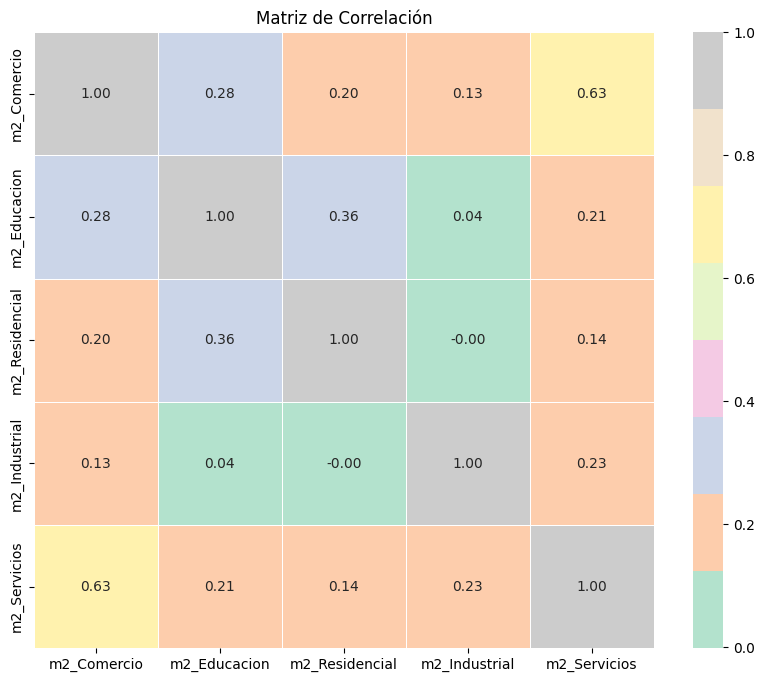

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas a utilizar para la correlación
columnas = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios']

# Calcular la matriz de correlación
correlation_matrix = df[columnas].corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel2', linewidths=0.5, fmt='.2f')

# Añadir título al gráfico
plt.title('Matriz de Correlación')
plt.show()


In [12]:
# Crear la matriz de correlación
correlation_matrix = df[columnas].corr()
correlation_unstacked = correlation_matrix.abs().unstack()
correlation_unstacked = correlation_unstacked[correlation_unstacked != 1]
max_corr = correlation_unstacked.idxmax()
max_value = correlation_unstacked.max()
print(f'Las columnas con mayor correlación son: {max_corr} con un valor de: {max_value}')


Las columnas con mayor correlación son: ('m2_Comercio', 'm2_Servicios') con un valor de: 0.6347415315382214


In [13]:
# Crear la matriz de correlación
correlation_matrix = df[columnas].corr()
correlation_unstacked = correlation_matrix.unstack()
negative_corr = correlation_unstacked[correlation_unstacked < 0]
min_corr = negative_corr.idxmin()
min_value = negative_corr.min()
print(f'Las columnas con mayor correlación negativa son: {min_corr} con un valor de: {min_value}')

Las columnas con mayor correlación negativa son: ('m2_Residencial', 'm2_Industrial') con un valor de: -0.001229668016540667


In [14]:
df['UF/m2'].describe()

,UF/m2
count,243.000000
mean,45.273086
std,18.375716
min,0.340000
25%,31.925000
50%,40.400000
75%,56.610000
max,123.210000


# Clustering

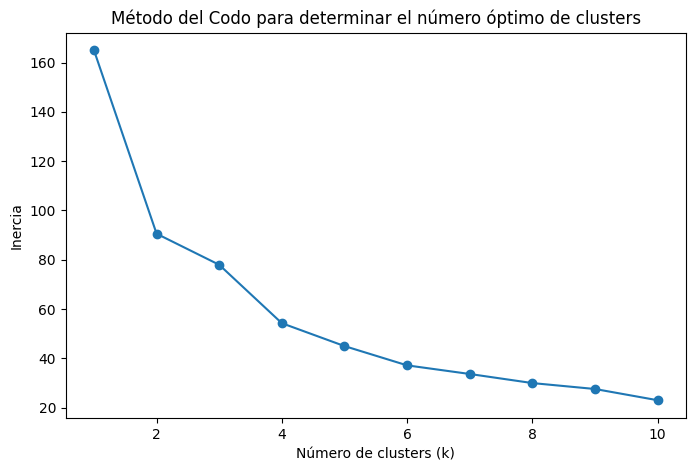

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped)
# Calcular la inercia para varios valores de k
inertia = []
K_range = range(1, 11)  # Probar con k desde 1 hasta 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Método del codo: Gráfica de la inercia en función de k
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()


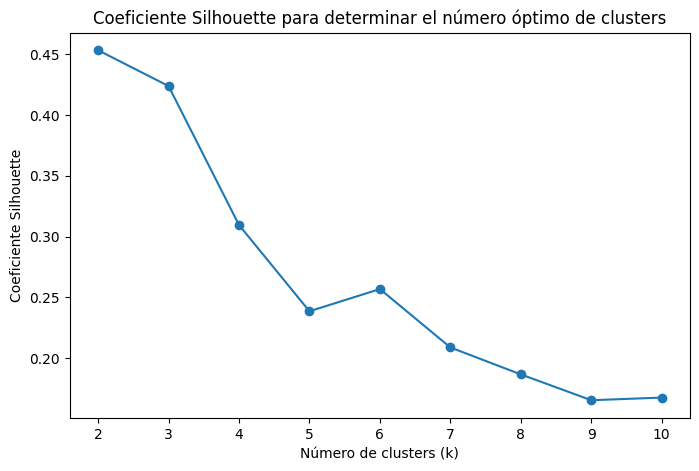

In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range[1:]:  # El coeficiente silhouette no se calcula para k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfica del coeficiente silhouette
plt.figure(figsize=(8, 5))
plt.plot(K_range[1:], silhouette_scores, marker='o')
plt.title('Coeficiente Silhouette para determinar el número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente Silhouette')
plt.show()


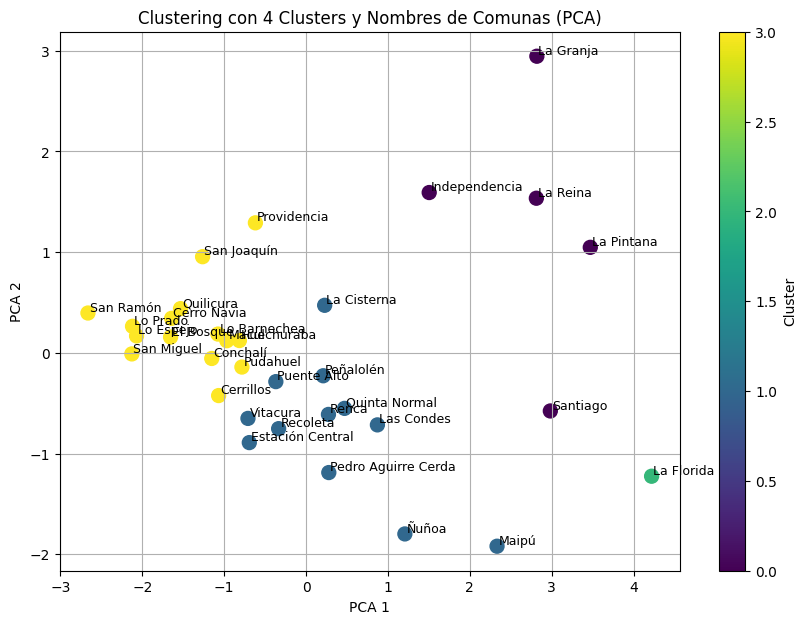

                     Cluster
Comuna                      
Cerrillos                  3
Cerro Navia                3
Conchalí                   3
El Bosque                  3
Estación Central           1
Huechuraba                 3
Independencia              0
La Cisterna                1
La Florida                 2
La Granja                  0
La Pintana                 0
La Reina                   0
Las Condes                 1
Lo Barnechea               3
Lo Espejo                  3
Lo Prado                   3
Macul                      3
Maipú                      1
Pedro Aguirre Cerda        1
Peñalolén                  1
Providencia                3
Pudahuel                   3
Puente Alto                1
Quilicura                  3
Quinta Normal              1
Recoleta                   1
Renca                      1
San Joaquín                3
San Miguel                 3
San Ramón                  3
Santiago                   0
Vitacura                   1
Ñuñoa         

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped)

# Ejecutar KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(df_scaled)

# Reducir las dimensiones a 2 componentes principales usando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Añadir las componentes PCA al DataFrame original
df_grouped['PCA1'] = df_pca[:, 0]
df_grouped['PCA2'] = df_pca[:, 1]

# Graficar los clusters y etiquetar las comunas
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_grouped['PCA1'], df_grouped['PCA2'], c=df_grouped['Cluster'], cmap='viridis', s=100)
plt.title('Clustering con 4 Clusters y Nombres de Comunas (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')

# Añadir etiquetas de las comunas
for i, comuna in enumerate(df_grouped.index):
    plt.text(df_grouped['PCA1'][i] + 0.02, df_grouped['PCA2'][i] + 0.02, comuna, fontsize=9)

plt.grid(True)
plt.show()

# Mostrar a qué cluster pertenece cada comuna
print(df_grouped[['Cluster']])


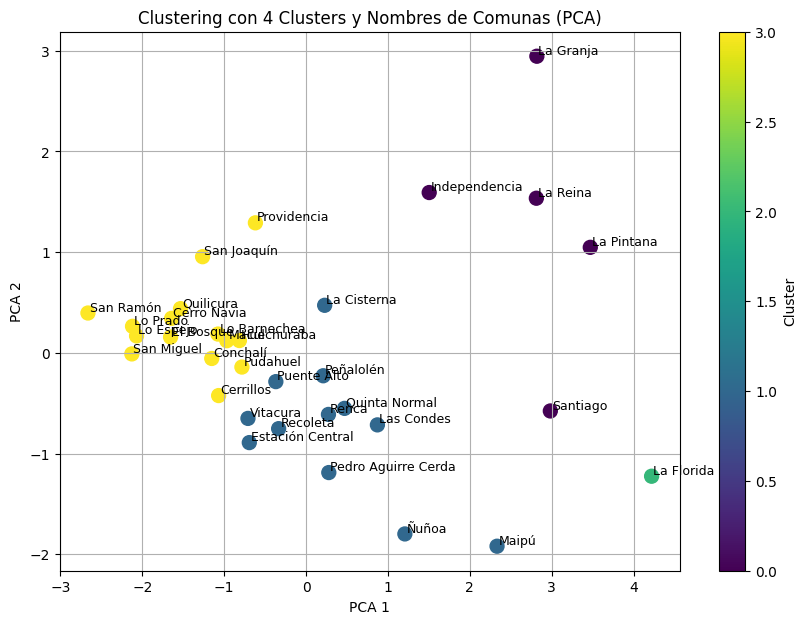

                     Cluster
Comuna                      
Cerrillos                  3
Cerro Navia                3
Conchalí                   3
El Bosque                  3
Estación Central           1
Huechuraba                 3
Independencia              0
La Cisterna                1
La Florida                 2
La Granja                  0
La Pintana                 0
La Reina                   0
Las Condes                 1
Lo Barnechea               3
Lo Espejo                  3
Lo Prado                   3
Macul                      3
Maipú                      1
Pedro Aguirre Cerda        1
Peñalolén                  1
Providencia                3
Pudahuel                   3
Puente Alto                1
Quilicura                  3
Quinta Normal              1
Recoleta                   1
Renca                      1
San Joaquín                3
San Miguel                 3
San Ramón                  3
Santiago                   0
Vitacura                   1
Ñuñoa         

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables específicas para el clustering
variables = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios']
df_selected = df_grouped[variables]

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Ejecutar KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(df_scaled)

# Reducir las dimensiones a 2 componentes principales usando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Añadir las componentes PCA al DataFrame original
df_grouped['PCA1'] = df_pca[:, 0]
df_grouped['PCA2'] = df_pca[:, 1]

# Graficar los clusters y etiquetar las comunas
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_grouped['PCA1'], df_grouped['PCA2'], c=df_grouped['Cluster'], cmap='viridis', s=100)
plt.title('Clustering con 4 Clusters y Nombres de Comunas (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')

# Añadir etiquetas de las comunas
for i, comuna in enumerate(df_grouped.index):
    plt.text(df_grouped['PCA1'][i] + 0.02, df_grouped['PCA2'][i] + 0.02, comuna, fontsize=9)

plt.grid(True)
plt.show()

# Mostrar a qué cluster pertenece cada comuna
print(df_grouped[['Cluster']])


# Técnicas de aprendizaje Supervisado

In [19]:
reporte2 = df.groupby('Comuna')['Zona_EOD'].count().reset_index()
reporte2.columns = ['Comuna', 'Cantidad de Zonas_EOD']
reporte2

,Comuna,Cantidad de Zonas_EOD
0,Cerrillos,16
1,Cerro Navia,14
2,Conchalí,20
3,El Bosque,17
4,Estación Central,23
5,Huechuraba,14
6,Independencia,15
7,La Cisterna,17
8,La Florida,45
9,La Granja,16


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import statsmodels.api as sm
import itertools

In [21]:
usos = ['m2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
uso = 'm2_Comercio'

def ajustar_modelo(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X = sm.add_constant(X)
    modelo = sm.OLS(y, X).fit()
    return modelo.rsquared, modelo.rsquared_adj, modelo.aic, modelo.bic, modelo.params

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_r2_adj = 0
mejor_aic = float('inf')
mejor_bic = float('inf')
mejor_comb = None
mejor_coeficientes = None

# Inicializa las mejores combinaciones por métrica
mejor_comb_aic = None
mejor_coeficientes_aic = None
mejor_comb_bic = None
mejor_coeficientes_bic = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, r_squared_adj, aic, bic, coeficientes = ajustar_modelo(uso, combinacion)

        # Comparar con R^2 ajustado
        if r_squared_adj > mejor_r2_adj:
            mejor_r2_adj = r_squared_adj
            mejor_comb = combinacion
            mejor_coeficientes = coeficientes

        # Comparar con AIC
        if aic < mejor_aic:
            mejor_aic = aic
            mejor_comb_aic = combinacion
            mejor_coeficientes_aic = coeficientes

        # Comparar con BIC
        if bic < mejor_bic:
            mejor_bic = bic
            mejor_comb_bic = combinacion
            mejor_coeficientes_bic = coeficientes

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2 Ajustado:", mejor_r2_adj)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2 Ajustado):", mejor_comb)
    print("Coeficientes (R^2 Ajustado):", mejor_coeficientes)

print("Mejor AIC:", mejor_aic)
if mejor_comb_aic is not None:
    print("Mejor combinación de variables (AIC):", mejor_comb_aic)
    print("Coeficientes (AIC):", mejor_coeficientes_aic)

print("Mejor BIC:", mejor_bic)
if mejor_comb_bic is not None:
    print("Mejor combinación de variables (BIC):", mejor_comb_bic)
    print("Coeficientes (BIC):", mejor_coeficientes_bic)

Variable explicada: m2_Comercio
Mejor R^2 Ajustado: 0.4289191922552321
Mejor combinación de variables (R^2 Ajustado): ('m2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros')
Coeficientes (R^2 Ajustado): const             6280.555689
m2_Educacion         0.264199
m2_Residencial       0.011444
m2_Industrial       -0.028526
m2_Servicios         0.325534
m2_Otros             0.060329
dtype: float64
Mejor AIC: 16103.225793799942
Mejor combinación de variables (AIC): ('m2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros')
Coeficientes (AIC): const             6280.555689
m2_Educacion         0.264199
m2_Residencial       0.011444
m2_Industrial       -0.028526
m2_Servicios         0.325534
m2_Otros             0.060329
dtype: float64
Mejor BIC: 16121.55207978665
Mejor combinación de variables (BIC): ('m2_Educacion', 'm2_Servicios')
Coeficientes (BIC): const           8220.970044
m2_Educacion       0.310400
m2_Servicios       0.327678
dtype: floa

In [22]:
usos = ['m2_Comercio', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
uso= 'm2_Educacion'

def ajustar_modelo(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X = sm.add_constant(X)
    modelo = sm.OLS(y, X).fit()
    return modelo.rsquared, modelo.rsquared_adj, modelo.aic, modelo.bic, modelo.params

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_r2_adj = 0
mejor_aic = float('inf')
mejor_bic = float('inf')
mejor_comb = None
mejor_coeficientes = None

# Inicializa las mejores combinaciones por métrica
mejor_comb_aic = None
mejor_coeficientes_aic = None
mejor_comb_bic = None
mejor_coeficientes_bic = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, r_squared_adj, aic, bic, coeficientes = ajustar_modelo(uso, combinacion)

        # Comparar con R^2 ajustado
        if r_squared_adj > mejor_r2_adj:
            mejor_r2_adj = r_squared_adj
            mejor_comb = combinacion
            mejor_coeficientes = coeficientes

        # Comparar con AIC
        if aic < mejor_aic:
            mejor_aic = aic
            mejor_comb_aic = combinacion
            mejor_coeficientes_aic = coeficientes

        # Comparar con BIC
        if bic < mejor_bic:
            mejor_bic = bic
            mejor_comb_bic = combinacion
            mejor_coeficientes_bic = coeficientes

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2 Ajustado:", mejor_r2_adj)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2 Ajustado):", mejor_comb)
    print("Coeficientes (R^2 Ajustado):", mejor_coeficientes)

print("Mejor AIC:", mejor_aic)
if mejor_comb_aic is not None:
    print("Mejor combinación de variables (AIC):", mejor_comb_aic)
    print("Coeficientes (AIC):", mejor_coeficientes_aic)

print("Mejor BIC:", mejor_bic)
if mejor_comb_bic is not None:
    print("Mejor combinación de variables (BIC):", mejor_comb_bic)
    print("Coeficientes (BIC):", mejor_coeficientes_bic)

Variable explicada: m2_Educacion
Mejor R^2 Ajustado: 0.17466652746163036
Mejor combinación de variables (R^2 Ajustado): ('m2_Comercio', 'm2_Residencial', 'm2_Servicios')
Coeficientes (R^2 Ajustado): const             3628.206432
m2_Comercio          0.086274
m2_Residencial       0.026525
m2_Servicios         0.014246
dtype: float64
Mejor AIC: 15341.47743462785
Mejor combinación de variables (AIC): ('m2_Comercio', 'm2_Residencial')
Coeficientes (AIC): const             3630.790447
m2_Comercio          0.102841
m2_Residencial       0.026585
dtype: float64
Mejor BIC: 15355.109170164544
Mejor combinación de variables (BIC): ('m2_Comercio', 'm2_Residencial')
Coeficientes (BIC): const             3630.790447
m2_Comercio          0.102841
m2_Residencial       0.026585
dtype: float64


In [23]:
usos = ['m2_Comercio', 'm2_Educacion', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
uso = 'm2_Residencial'

def ajustar_modelo(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X = sm.add_constant(X)
    modelo = sm.OLS(y, X).fit()
    return modelo.rsquared, modelo.rsquared_adj, modelo.aic, modelo.bic, modelo.params

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_r2_adj = 0
mejor_aic = float('inf')
mejor_bic = float('inf')
mejor_comb = None
mejor_coeficientes = None

# Inicializa las mejores combinaciones por métrica
mejor_comb_aic = None
mejor_coeficientes_aic = None
mejor_comb_bic = None
mejor_coeficientes_bic = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, r_squared_adj, aic, bic, coeficientes = ajustar_modelo(uso, combinacion)

        # Comparar con R^2 ajustado
        if r_squared_adj > mejor_r2_adj:
            mejor_r2_adj = r_squared_adj
            mejor_comb = combinacion
            mejor_coeficientes = coeficientes

        # Comparar con AIC
        if aic < mejor_aic:
            mejor_aic = aic
            mejor_comb_aic = combinacion
            mejor_coeficientes_aic = coeficientes

        # Comparar con BIC
        if bic < mejor_bic:
            mejor_bic = bic
            mejor_comb_bic = combinacion
            mejor_coeficientes_bic = coeficientes

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2 Ajustado:", mejor_r2_adj)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2 Ajustado):", mejor_comb)
    print("Coeficientes (R^2 Ajustado):", mejor_coeficientes)

print("Mejor AIC:", mejor_aic)
if mejor_comb_aic is not None:
    print("Mejor combinación de variables (AIC):", mejor_comb_aic)
    print("Coeficientes (AIC):", mejor_coeficientes_aic)

print("Mejor BIC:", mejor_bic)
if mejor_comb_bic is not None:
    print("Mejor combinación de variables (BIC):", mejor_comb_bic)
    print("Coeficientes (BIC):", mejor_coeficientes_bic)

Variable explicada: m2_Residencial
Mejor R^2 Ajustado: 0.14168294878494625
Mejor combinación de variables (R^2 Ajustado): ('m2_Comercio', 'm2_Educacion', 'm2_Industrial', 'm2_Otros')
Coeficientes (R^2 Ajustado): const            144413.675274
m2_Comercio           0.619149
m2_Educacion          4.067191
m2_Industrial        -0.161157
m2_Otros              0.268063
dtype: float64
Mejor AIC: 18833.57748367846
Mejor combinación de variables (AIC): ('m2_Comercio', 'm2_Educacion')
Coeficientes (AIC): const           144164.461306
m2_Comercio          0.627014
m2_Educacion         4.043907
dtype: float64
Mejor BIC: 18847.209219215154
Mejor combinación de variables (BIC): ('m2_Comercio', 'm2_Educacion')
Coeficientes (BIC): const           144164.461306
m2_Comercio          0.627014
m2_Educacion         4.043907
dtype: float64


In [24]:
usos = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Servicios', 'm2_Otros']
uso = 'm2_Industrial'

def ajustar_modelo(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X = sm.add_constant(X)
    modelo = sm.OLS(y, X).fit()
    return modelo.rsquared, modelo.rsquared_adj, modelo.aic, modelo.bic, modelo.params

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_r2_adj = 0
mejor_aic = float('inf')
mejor_bic = float('inf')
mejor_comb = None
mejor_coeficientes = None

# Inicializa las mejores combinaciones por métrica
mejor_comb_aic = None
mejor_coeficientes_aic = None
mejor_comb_bic = None
mejor_coeficientes_bic = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, r_squared_adj, aic, bic, coeficientes = ajustar_modelo(uso, combinacion)

        # Comparar con R^2 ajustado
        if r_squared_adj > mejor_r2_adj:
            mejor_r2_adj = r_squared_adj
            mejor_comb = combinacion
            mejor_coeficientes = coeficientes

        # Comparar con AIC
        if aic < mejor_aic:
            mejor_aic = aic
            mejor_comb_aic = combinacion
            mejor_coeficientes_aic = coeficientes

        # Comparar con BIC
        if bic < mejor_bic:
            mejor_bic = bic
            mejor_comb_bic = combinacion
            mejor_coeficientes_bic = coeficientes

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2 Ajustado:", mejor_r2_adj)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2 Ajustado):", mejor_comb)
    print("Coeficientes (R^2 Ajustado):", mejor_coeficientes)

print("Mejor AIC:", mejor_aic)
if mejor_comb_aic is not None:
    print("Mejor combinación de variables (AIC):", mejor_comb_aic)
    print("Coeficientes (AIC):", mejor_coeficientes_aic)

print("Mejor BIC:", mejor_bic)
if mejor_comb_bic is not None:
    print("Mejor combinación de variables (BIC):", mejor_comb_bic)
    print("Coeficientes (BIC):", mejor_coeficientes_bic)

Variable explicada: m2_Industrial
Mejor R^2 Ajustado: 0.5702552395878171
Mejor combinación de variables (R^2 Ajustado): ('m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Servicios', 'm2_Otros')
Coeficientes (R^2 Ajustado): const             9773.169641
m2_Comercio         -0.195692
m2_Educacion         0.175159
m2_Residencial      -0.022080
m2_Servicios         0.210614
m2_Otros             1.358556
dtype: float64
Mejor AIC: 17440.407731912168
Mejor combinación de variables (AIC): ('m2_Comercio', 'm2_Servicios', 'm2_Otros')
Coeficientes (AIC): const           7334.557978
m2_Comercio       -0.199413
m2_Servicios       0.212181
m2_Otros           1.356761
dtype: float64
Mejor BIC: 17456.244942358142
Mejor combinación de variables (BIC): ('m2_Servicios', 'm2_Otros')
Coeficientes (BIC): const           5165.109143
m2_Servicios       0.144085
m2_Otros           1.352711
dtype: float64


In [25]:
usos = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Otros']
uso = 'm2_Servicios'

def ajustar_modelo(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X = sm.add_constant(X)
    modelo = sm.OLS(y, X).fit()
    return modelo.rsquared, modelo.rsquared_adj, modelo.aic, modelo.bic, modelo.params

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_r2_adj = 0
mejor_aic = float('inf')
mejor_bic = float('inf')
mejor_comb = None
mejor_coeficientes = None

# Inicializa las mejores combinaciones por métrica
mejor_comb_aic = None
mejor_coeficientes_aic = None
mejor_comb_bic = None
mejor_coeficientes_bic = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, r_squared_adj, aic, bic, coeficientes = ajustar_modelo(uso, combinacion)

        # Comparar con R^2 ajustado
        if r_squared_adj > mejor_r2_adj:
            mejor_r2_adj = r_squared_adj
            mejor_comb = combinacion
            mejor_coeficientes = coeficientes

        # Comparar con AIC
        if aic < mejor_aic:
            mejor_aic = aic
            mejor_comb_aic = combinacion
            mejor_coeficientes_aic = coeficientes

        # Comparar con BIC
        if bic < mejor_bic:
            mejor_bic = bic
            mejor_comb_bic = combinacion
            mejor_coeficientes_bic = coeficientes

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2 Ajustado:", mejor_r2_adj)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2 Ajustado):", mejor_comb)
    print("Coeficientes (R^2 Ajustado):", mejor_coeficientes)

print("Mejor AIC:", mejor_aic)
if mejor_comb_aic is not None:
    print("Mejor combinación de variables (AIC):", mejor_comb_aic)
    print("Coeficientes (AIC):", mejor_coeficientes_aic)

print("Mejor BIC:", mejor_bic)
if mejor_comb_bic is not None:
    print("Mejor combinación de variables (BIC):", mejor_comb_bic)
    print("Coeficientes (BIC):", mejor_coeficientes_bic)

Variable explicada: m2_Servicios
Mejor R^2 Ajustado: 0.4240070213898134
Mejor combinación de variables (R^2 Ajustado): ('m2_Comercio', 'm2_Educacion', 'm2_Industrial')
Coeficientes (R^2 Ajustado): const           -2959.112802
m2_Comercio         1.111616
m2_Educacion        0.151587
m2_Industrial       0.091467
dtype: float64
Mejor AIC: 16954.432524726795
Mejor combinación de variables (AIC): ('m2_Comercio', 'm2_Industrial')
Coeficientes (AIC): const           -1691.331130
m2_Comercio         1.131916
m2_Industrial       0.091462
dtype: float64
Mejor BIC: 16968.06426026349
Mejor combinación de variables (BIC): ('m2_Comercio', 'm2_Industrial')
Coeficientes (BIC): const           -1691.331130
m2_Comercio         1.131916
m2_Industrial       0.091462
dtype: float64


In [26]:
usos = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios']
uso = 'm2_Otros'

def ajustar_modelo(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X = sm.add_constant(X)
    modelo = sm.OLS(y, X).fit()
    return modelo.rsquared, modelo.rsquared_adj, modelo.aic, modelo.bic, modelo.params

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_r2_adj = 0
mejor_aic = float('inf')
mejor_bic = float('inf')
mejor_comb = None
mejor_coeficientes = None

# Inicializa las mejores combinaciones por métrica
mejor_comb_aic = None
mejor_coeficientes_aic = None
mejor_comb_bic = None
mejor_coeficientes_bic = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, r_squared_adj, aic, bic, coeficientes = ajustar_modelo(uso, combinacion)

        # Comparar con R^2 ajustado
        if r_squared_adj > mejor_r2_adj:
            mejor_r2_adj = r_squared_adj
            mejor_comb = combinacion
            mejor_coeficientes = coeficientes

        # Comparar con AIC
        if aic < mejor_aic:
            mejor_aic = aic
            mejor_comb_aic = combinacion
            mejor_coeficientes_aic = coeficientes

        # Comparar con BIC
        if bic < mejor_bic:
            mejor_bic = bic
            mejor_comb_bic = combinacion
            mejor_coeficientes_bic = coeficientes

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2 Ajustado:", mejor_r2_adj)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2 Ajustado):", mejor_comb)
    print("Coeficientes (R^2 Ajustado):", mejor_coeficientes)

print("Mejor AIC:", mejor_aic)
if mejor_comb_aic is not None:
    print("Mejor combinación de variables (AIC):", mejor_comb_aic)
    print("Coeficientes (AIC):", mejor_coeficientes_aic)

print("Mejor BIC:", mejor_bic)
if mejor_comb_bic is not None:
    print("Mejor combinación de variables (BIC):", mejor_comb_bic)
    print("Coeficientes (BIC):", mejor_coeficientes_bic)

Variable explicada: m2_Otros
Mejor R^2 Ajustado: 0.5643512744140003
Mejor combinación de variables (R^2 Ajustado): ('m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial')
Coeficientes (R^2 Ajustado): const             3235.625457
m2_Comercio          0.100851
m2_Educacion        -0.130432
m2_Residencial       0.010712
m2_Industrial        0.402146
dtype: float64
Mejor AIC: 16596.129033111494
Mejor combinación de variables (AIC): ('m2_Comercio', 'm2_Industrial')
Coeficientes (AIC): const            4067.766746
m2_Comercio         0.096127
m2_Industrial       0.401575
dtype: float64
Mejor BIC: 16608.627536073036
Mejor combinación de variables (BIC): ('m2_Industrial',)
Coeficientes (BIC): const            5774.422727
m2_Industrial       0.405718
dtype: float64


In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
usos = ['m2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
uso = 'm2_Comercio'

def ajustar_modelo(uso_objetivo, variables, kernel='poly', C=1.0):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]

    # Ajustar el modelo SVR
    modelo = SVR(kernel=kernel, C=C)
    modelo.fit(X, y)

    # Predicciones
    y_pred = modelo.predict(X)

    # Calcular R^2 y MSE
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return r_squared, mse, modelo

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_mse = float('inf')
mejor_comb = None
mejor_modelo = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, mse, modelo = ajustar_modelo(uso, combinacion)

        # Comparar con R^2
        if r_squared > mejor_r2:
            mejor_r2 = r_squared
            mejor_comb = combinacion
            mejor_modelo = modelo

        # Comparar con MSE
        if mse < mejor_mse:
            mejor_mse = mse

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2:", mejor_r2)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2):", mejor_comb)

print("Mejor MSE:", mejor_mse)


Variable explicada: m2_Comercio
Mejor R^2: 0.17389477483969074
Mejor combinación de variables (R^2): ('m2_Educacion', 'm2_Servicios', 'm2_Otros')
Mejor MSE: 968624836.417455


In [29]:
usos = ['m2_Comercio', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
uso= 'm2_Educacion'

def ajustar_modelo(uso_objetivo, variables, kernel='poly', C=1.0):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]

    # Ajustar el modelo SVR
    modelo = SVR(kernel=kernel, C=C)
    modelo.fit(X, y)

    # Predicciones
    y_pred = modelo.predict(X)

    # Calcular R^2 y MSE
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return r_squared, mse, modelo

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_mse = float('inf')
mejor_comb = None
mejor_modelo = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, mse, modelo = ajustar_modelo(uso, combinacion)

        # Comparar con R^2
        if r_squared > mejor_r2:
            mejor_r2 = r_squared
            mejor_comb = combinacion
            mejor_modelo = modelo

        # Comparar con MSE
        if mse < mejor_mse:
            mejor_mse = mse

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2:", mejor_r2)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2):", mejor_comb)

print("Mejor MSE:", mejor_mse)

Variable explicada: m2_Educacion
Mejor R^2: 0
Mejor MSE: 274278263.6085556


In [30]:
usos = ['m2_Comercio', 'm2_Educacion', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
uso = 'm2_Residencial'

def ajustar_modelo(uso_objetivo, variables, kernel='poly', C=1.0):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]

    # Ajustar el modelo SVR
    modelo = SVR(kernel=kernel, C=C)
    modelo.fit(X, y)

    # Predicciones
    y_pred = modelo.predict(X)

    # Calcular R^2 y MSE
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return r_squared, mse, modelo

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_mse = float('inf')
mejor_comb = None
mejor_modelo = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, mse, modelo = ajustar_modelo(uso, combinacion)

        # Comparar con R^2
        if r_squared > mejor_r2:
            mejor_r2 = r_squared
            mejor_comb = combinacion
            mejor_modelo = modelo

        # Comparar con MSE
        if mse < mejor_mse:
            mejor_mse = mse

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2:", mejor_r2)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2):", mejor_comb)

print("Mejor MSE:", mejor_mse)

Variable explicada: m2_Residencial
Mejor R^2: 0
Mejor MSE: 42364747362.44624


In [31]:
usos = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Servicios', 'm2_Otros']
uso = 'm2_Industrial'

def ajustar_modelo(uso_objetivo, variables, kernel='poly', C=1.0):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]

    # Ajustar el modelo SVR
    modelo = SVR(kernel=kernel, C=C)
    modelo.fit(X, y)

    # Predicciones
    y_pred = modelo.predict(X)

    # Calcular R^2 y MSE
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return r_squared, mse, modelo

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_mse = float('inf')
mejor_comb = None
mejor_modelo = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, mse, modelo = ajustar_modelo(uso, combinacion)

        # Comparar con R^2
        if r_squared > mejor_r2:
            mejor_r2 = r_squared
            mejor_comb = combinacion
            mejor_modelo = modelo

        # Comparar con MSE
        if mse < mejor_mse:
            mejor_mse = mse

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2:", mejor_r2)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2):", mejor_comb)

print("Mejor MSE:", mejor_mse)

Variable explicada: m2_Industrial
Mejor R^2: 0.4738717925007915
Mejor combinación de variables (R^2): ('m2_Educacion', 'm2_Servicios', 'm2_Otros')
Mejor MSE: 5623776932.625324


In [32]:
usos = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Otros']
uso = 'm2_Servicios'

def ajustar_modelo(uso_objetivo, variables, kernel='poly', C=1.0):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]

    # Ajustar el modelo SVR
    modelo = SVR(kernel=kernel, C=C)
    modelo.fit(X, y)

    # Predicciones
    y_pred = modelo.predict(X)

    # Calcular R^2 y MSE
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return r_squared, mse, modelo

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_mse = float('inf')
mejor_comb = None
mejor_modelo = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, mse, modelo = ajustar_modelo(uso, combinacion)

        # Comparar con R^2
        if r_squared > mejor_r2:
            mejor_r2 = r_squared
            mejor_comb = combinacion
            mejor_modelo = modelo

        # Comparar con MSE
        if mse < mejor_mse:
            mejor_mse = mse

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2:", mejor_r2)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2):", mejor_comb)

print("Mejor MSE:", mejor_mse)

Variable explicada: m2_Servicios
Mejor R^2: 0.21915288064371596
Mejor combinación de variables (R^2): ('m2_Comercio', 'm2_Educacion')
Mejor MSE: 3099297865.283736


In [33]:
usos = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios']
uso = 'm2_Otros'

def ajustar_modelo(uso_objetivo, variables, kernel='poly', C=1.0):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]

    # Ajustar el modelo SVR
    modelo = SVR(kernel=kernel, C=C)
    modelo.fit(X, y)

    # Predicciones
    y_pred = modelo.predict(X)

    # Calcular R^2 y MSE
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return r_squared, mse, modelo

# Inicializa las mejores métricas
mejor_r2 = 0
mejor_mse = float('inf')
mejor_comb = None
mejor_modelo = None

for i in range(len(usos), 0, -1):
    for combinacion in itertools.combinations(usos, i):
        r_squared, mse, modelo = ajustar_modelo(uso, combinacion)

        # Comparar con R^2
        if r_squared > mejor_r2:
            mejor_r2 = r_squared
            mejor_comb = combinacion
            mejor_modelo = modelo

        # Comparar con MSE
        if mse < mejor_mse:
            mejor_mse = mse

# Resultados finales
print("Variable explicada:", uso)
print("Mejor R^2:", mejor_r2)
if mejor_comb is not None:
    print("Mejor combinación de variables (R^2):", mejor_comb)

print("Mejor MSE:", mejor_mse)

Variable explicada: m2_Otros
Mejor R^2: 0.35776654181553036
Mejor combinación de variables (R^2): ('m2_Comercio', 'm2_Industrial')
Mejor MSE: 2012077143.1757092


In [34]:
df_grouped.columns = df_grouped.columns.str.strip()
df_grouped.columns

Index(['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial',
       'm2_Servicios', 'Cluster', 'PCA1', 'PCA2'],
      dtype='object')

### Gráfico para ver como se relacion las variables de estudio entre ellas

<Figure size 1200x1000 with 0 Axes>

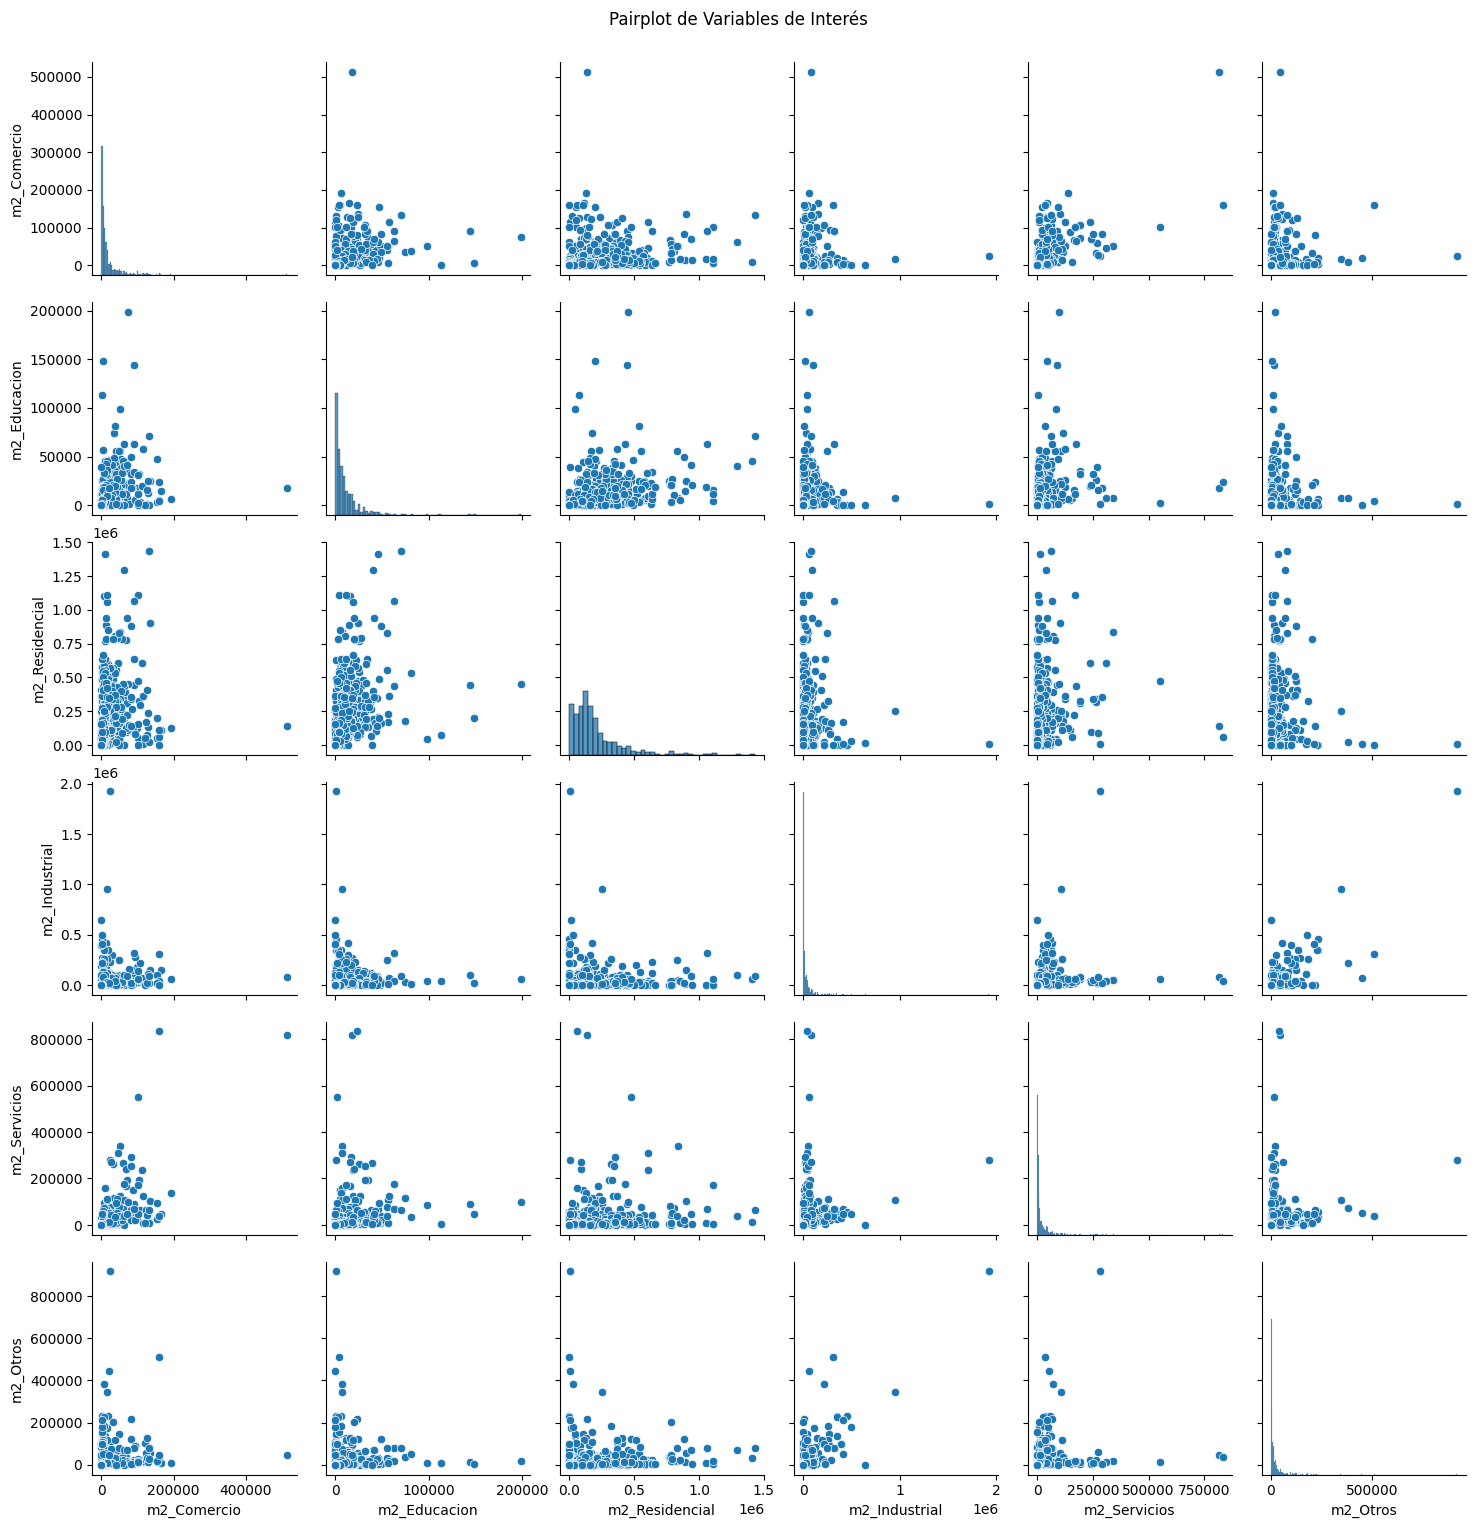

In [35]:
variables_de_interes = ['m2_Comercio','m2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
g = Usos_Final[variables_de_interes]

plt.figure(figsize=(12, 10))
sns.pairplot(g)
plt.suptitle('Pairplot de Variables de Interés', y=1.02)
plt.show()


### Ahora buscamos las mejores combinaciones posible para cada variable dependiente a utilizar en los modelos


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
variables = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
resultados_finales = []
scaler = StandardScaler()

def ajustar_modelo_rf(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X_normalizado = scaler.fit_transform(X)

    modelo_rf = RandomForestRegressor(random_state=123)
    modelo_rf.fit(X_normalizado, y)
    y_pred = modelo_rf.predict(X_normalizado)

    r_2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    return r_2, mse, rmse, modelo_rf.feature_importances_

resultados_rf_finales = []

for variable_dependiente in variables:
    lista_restantes = [var for var in variables if var != variable_dependiente]
    mejor_r2 = -float('inf')
    mejor_comb = None
    mejor_importancias = None
    mejor_mse = float('inf')
    mejor_rmse = float('inf')

    for r in range(1, len(lista_restantes) + 1):
        for comb in itertools.combinations(lista_restantes, r):
            r_2, mse, rmse, importancias = ajustar_modelo_rf(variable_dependiente, comb)

            if r_2 > mejor_r2:
                mejor_r2 = r_2
                mejor_comb = comb
                mejor_importancias = importancias
                mejor_mse = mse
                mejor_rmse = rmse

    resultados_rf_finales.append({
        'Variable Dependiente': variable_dependiente,
        'Mejor Combinación': ', '.join(mejor_comb) if mejor_comb else None,
        'Mejor R^2': mejor_r2,
        'MSE': mejor_mse,
        'RMSE': mejor_rmse,
        'Importancia': mejor_importancias
    })

resultados_rf_final = pd.DataFrame(resultados_rf_finales)

for index, row in resultados_rf_final.iterrows():
    print(f"Variable Dependiente: {row['Variable Dependiente']}")
    print(f"Mejor Combinación: {row['Mejor Combinación']}")
    print(f"Mejor R^2: {row['Mejor R^2']:.4f}")
    print(f"MSE: {row['MSE']:.4f}")
    print(f"RMSE: {row['RMSE']:.4f}")
    print("Importancia de Variables:")
    if row['Importancia'] is not None:
        importancias_df = pd.DataFrame({
            'Variable': row['Mejor Combinación'].split(', '),
            'Importancia': row['Importancia']
        })
        print(importancias_df.sort_values(by='Importancia', ascending=False))
    print("\n")

print(resultados_rf_final)


Variable Dependiente: m2_Comercio
Mejor Combinación: m2_Residencial, m2_Industrial, m2_Servicios, m2_Otros
Mejor R^2: 0.9138
MSE: 101015622.4351
RMSE: 10050.6528
Importancia de Variables:
         Variable  Importancia
2    m2_Servicios     0.636930
3        m2_Otros     0.134012
1   m2_Industrial     0.116614
0  m2_Residencial     0.112444


Variable Dependiente: m2_Educacion
Mejor Combinación: m2_Residencial, m2_Servicios
Mejor R^2: 0.9038
MSE: 26176861.7131
RMSE: 5116.3328
Importancia de Variables:
         Variable  Importancia
0  m2_Residencial      0.50193
1    m2_Servicios      0.49807


Variable Dependiente: m2_Residencial
Mejor Combinación: m2_Comercio, m2_Educacion, m2_Industrial, m2_Servicios, m2_Otros
Mejor R^2: 0.9031
MSE: 3855650135.7332
RMSE: 62093.8816
Importancia de Variables:
        Variable  Importancia
1   m2_Educacion     0.382652
4       m2_Otros     0.216545
2  m2_Industrial     0.171449
3   m2_Servicios     0.118614
0    m2_Comercio     0.110740


Variable Depe

In [37]:
resultados_rf_final

,Variable Dependiente,Mejor Combinación,Mejor R^2,MSE,RMSE,Importancia
0,m2_Comercio,"m2_Residencial, m2_Industrial, m2_Servicios, m...",0.913847,1.010156e+08,10050.652836,"[0.11244386334854312, 0.1166136027434987, 0.63..."
1,m2_Educacion,"m2_Residencial, m2_Servicios",0.903800,2.617686e+07,5116.332838,"[0.5019301807034139, 0.49806981929658606]"
2,m2_Residencial,"m2_Comercio, m2_Educacion, m2_Industrial, m2_S...",0.903108,3.855650e+09,62093.881629,"[0.11073955549396865, 0.38265225250654655, 0.1..."
3,m2_Industrial,"m2_Educacion, m2_Servicios, m2_Otros",0.923107,8.219116e+08,28669.000663,"[0.090738310079863, 0.24853756269147317, 0.660..."
4,m2_Servicios,"m2_Comercio, m2_Educacion, m2_Residencial, m2_...",0.901536,3.908192e+08,19769.148518,"[0.5794802723416884, 0.12497103650551392, 0.10..."
5,m2_Otros,"m2_Comercio, m2_Educacion, m2_Residencial, m2_...",0.912045,2.755584e+08,16599.951550,"[0.1291182184766744, 0.050198665360503894, 0.1..."


## Decision Tree Regressor

In [38]:
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


In [40]:
from sklearn.tree import DecisionTreeRegressor
variables_dependientes = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
resultados_finales = []
scaler = StandardScaler()

def ajustar_modelo_tree(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X_normalizado = scaler.fit_transform(X)

    modelo_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
    modelo_tree.fit(X_normalizado, y)

    y_pred = modelo_tree.predict(X_normalizado)
    r_2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    return r_2, mse, rmse, modelo_tree.feature_importances_

for variable_dependiente in variables_dependientes:
    lista_restantes = [var for var in variables_dependientes if var != variable_dependiente]
    mejor_r2 = -float('inf')
    mejor_comb = None
    mejor_importancias = None
    mejor_mse = float('inf')
    mejor_rmse = float('inf')

    for r in range(1, len(lista_restantes) + 1):
        for comb in itertools.combinations(lista_restantes, r):
            r_2, mse, rmse, importancias = ajustar_modelo_tree(variable_dependiente, comb)

            if r_2 > mejor_r2:
                mejor_r2 = r_2
                mejor_comb = comb
                mejor_importancias = importancias
                mejor_mse = mse
                mejor_rmse = rmse

    resultados_finales.append({
        'Variable Dependiente': variable_dependiente,
        'Mejor Combinación': ', '.join(mejor_comb) if mejor_comb else None,
        'Mejor R^2': mejor_r2,
        'MSE': mejor_mse,
        'RMSE': mejor_rmse,
        'Importancias': mejor_importancias
    })

resultados_tree_final = pd.DataFrame(resultados_finales)

for index, row in resultados_tree_final.iterrows():
    print(f"Variable Dependiente: {row['Variable Dependiente']}")
    print(f"Mejor Combinación: {row['Mejor Combinación']}")
    print(f"Mejor R^2: {row['Mejor R^2']:.4f}")
    print(f"MSE: {row['MSE']:.4f}")
    print(f"RMSE: {row['RMSE']:.4f}")
    print("Importancias de Variables:")
    if row['Importancias'] is not None:
        importancias_df = pd.DataFrame({
            'Variable': row['Mejor Combinación'].split(', '),
            'Importancia': row['Importancias']
        })
        print(importancias_df.sort_values(by='Importancia', ascending=False))
    print("\n")

print(resultados_tree_final)


Variable Dependiente: m2_Comercio
Mejor Combinación: m2_Educacion, m2_Servicios, m2_Otros
Mejor R^2: 0.6315
MSE: 432070554.5723
RMSE: 20786.3069
Importancias de Variables:
       Variable  Importancia
1  m2_Servicios     0.872119
0  m2_Educacion     0.101419
2      m2_Otros     0.026462


Variable Dependiente: m2_Educacion
Mejor Combinación: m2_Comercio, m2_Residencial, m2_Industrial
Mejor R^2: 0.6629
MSE: 91734152.0933
RMSE: 9577.7947
Importancias de Variables:
         Variable  Importancia
1  m2_Residencial      0.42875
2   m2_Industrial      0.32386
0     m2_Comercio      0.24739


Variable Dependiente: m2_Residencial
Mejor Combinación: m2_Educacion, m2_Industrial, m2_Servicios, m2_Otros
Mejor R^2: 0.5164
MSE: 19243696813.3847
RMSE: 138721.6523
Importancias de Variables:
        Variable  Importancia
0   m2_Educacion     0.555621
3       m2_Otros     0.249943
1  m2_Industrial     0.103330
2   m2_Servicios     0.091107


Variable Dependiente: m2_Industrial
Mejor Combinación: m2_Come

In [41]:
resultados_tree_final

,Variable Dependiente,Mejor Combinación,Mejor R^2,MSE,RMSE,Importancias
0,m2_Comercio,"m2_Educacion, m2_Servicios, m2_Otros",0.631503,4.320706e+08,20786.306901,"[0.1014188337661534, 0.8721190443958068, 0.026..."
1,m2_Educacion,"m2_Comercio, m2_Residencial, m2_Industrial",0.662876,9.173415e+07,9577.794741,"[0.24739002779382893, 0.42874976909234025, 0.3..."
2,m2_Residencial,"m2_Educacion, m2_Industrial, m2_Servicios, m2_...",0.516409,1.924370e+10,138721.652288,"[0.5556205971372246, 0.10332962688188552, 0.09..."
3,m2_Industrial,"m2_Comercio, m2_Educacion, m2_Servicios, m2_Otros",0.843853,1.669055e+09,40854.067347,"[0.005181829280274002, 0.10798227105774351, 0...."
4,m2_Servicios,"m2_Educacion, m2_Residencial, m2_Industrial, m...",0.662563,1.339336e+09,36596.942446,"[0.4176127820246903, 0.34856867775166966, 0.22..."
5,m2_Otros,"m2_Industrial, m2_Servicios",0.800099,6.262761e+08,25025.509079,"[0.9629289696226285, 0.03707103037737153]"


### Estimación del valor vivienda usando regresion y random forest

### Regresión

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
Usos_Final.columns = Usos_Final.columns.str.strip()
if 'UF/m2' in Usos_Final.columns:
    data_con_valores = Usos_Final[Usos_Final['UF/m2'].notnull()]
    data_sin_valores = Usos_Final[Usos_Final['UF/m2'].isnull()]

    X = data_con_valores[['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial',
                           'm2_Servicios', 'm2_Otros', 'GSE Alto', 'GSE Medio Alto',
                           'GSE Medio', 'GSE Medio bajo', 'GSE Bajo']]
    y = data_con_valores['UF/m2']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_2 = r2_score(y_test, y_pred)

    print("Evaluación del modelo:")
    print(f"R^2: {r_2}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

    X_faltantes = data_sin_valores[['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial',
                                       'm2_Servicios', 'm2_Otros', 'GSE Alto', 'GSE Medio Alto',
                                       'GSE Medio', 'GSE Medio bajo', 'GSE Bajo']]
    X_faltantes_escalado = scaler.transform(X_faltantes)
    valores_pred = modelo.predict(X_faltantes_escalado)
    Usos_Final.loc[Usos_Final['UF/m2'].isnull(), 'UF/m2'] = valores_pred
else:
    print("La columna 'Valor de oferta de vivienda (uf/m2)' no existe")


Evaluación del modelo:
R^2: 0.38082220106745956
MSE: 157.14480440510906
RMSE: 12.535741079214626


### evaluacion random forest

In [44]:
modelo_rf2 = RandomForestRegressor(n_estimators=100)
modelo_rf2.fit(X_train, y_train)
y_pred_rf = modelo_rf2.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r_2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print("Evaluación random forest:")
print(f"R^2: {r_2_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")


Evaluación random forest:
R^2: 0.589748604161985
MSE: 104.120133937347
RMSE: 10.203927378090604


### Gráfico para visualizar los valores reales y los predecidos por el modelo de random forest

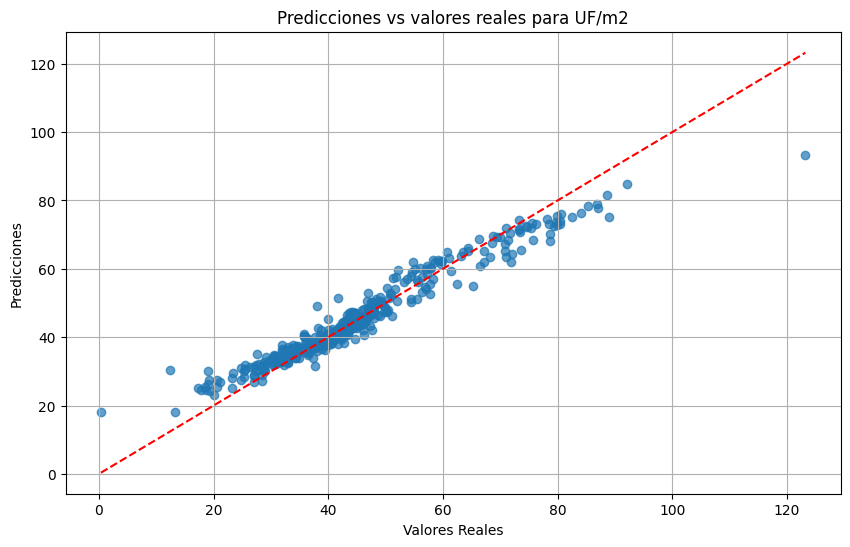

In [45]:
from sklearn.preprocessing import OneHotEncoder

variable_dependiente = 'UF/m2'
lista = [var for var in Usos_Final.columns if var != variable_dependiente]

X = Usos_Final[lista]
y = Usos_Final[variable_dependiente].dropna()
X = X.loc[y.index]
X_transformado = pd.get_dummies(X, drop_first=True)

modelo_rf2 = RandomForestRegressor()
modelo_rf2.fit(X_transformado, y)
y_pred = modelo_rf2.predict(X_transformado)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs valores reales para ' + variable_dependiente)
plt.grid(True)
plt.show()


### Por ultimo, podemos visualizar como es la distribucion en los precios de las viviendas

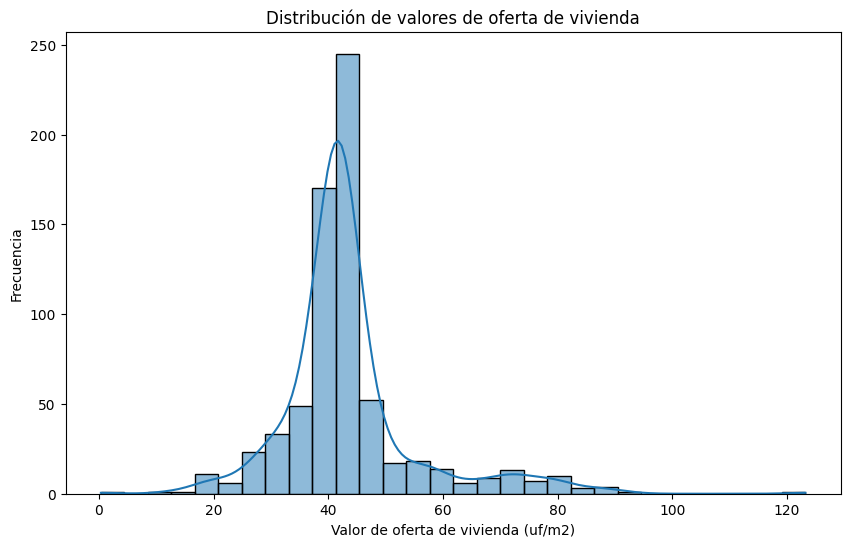

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(Usos_Final[variable_dependiente], bins=30, kde=True)
plt.title('Distribución de valores de oferta de vivienda')
plt.xlabel('Valor de oferta de vivienda (uf/m2)')
plt.ylabel('Frecuencia')
plt.show()
